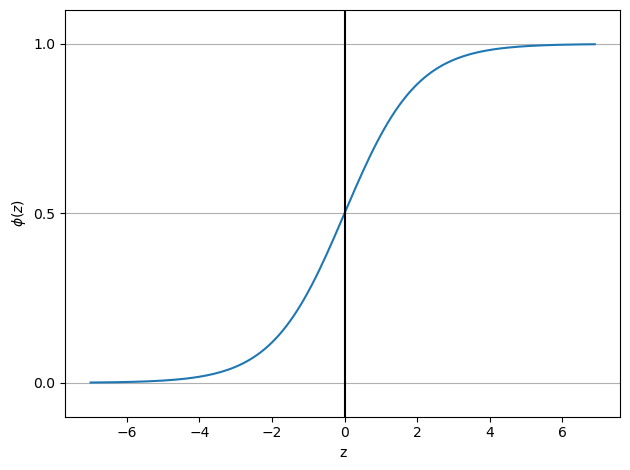

In [2]:
#ALGORITMO DI CLASSIFICAZIONE

#TRACCIAMO LA SIGMOIDE (-7,7) PER VEDERE IL SUO ASPETTO

import matplotlib.pyplot as plt
import numpy as np

def sigmoid(z):
    return 1.0 /(1.0 +np.exp(-z))

z=np.arange(-7,7,0.1)
phi_z=sigmoid(z)
plt.plot(z,phi_z)
plt.axvline(0.0,color="k")
plt.ylim(-0.1,1.1)
plt.xlabel("z")
plt.ylabel("$\phi (z)$")
plt.yticks([0.0,0.5,1.0])
ax=plt.gca()
ax.yaxis.grid(True)
plt.tight_layout()
plt.show()

#la sigmoide[0-1] mi da la probabilità di classificazione
#più z--> oo quando la probabilità si avvina a 1 e quindi exp(-z) è molto piccolo
#0.5 si intersecano gli assi
#classificazione binaria
#0 e 1 indicano due classi diverse(esempio: 1=iris-setosa, 0=altro_iris)
#questo vuo dire che se ci muoviamo lungo la sigmoide avremo la probabilità di appartenenza ad una 
#determinata classe--> se z=0.8 vuol dire che si ha una prob dell'80% che sia iris-setosa

ADDESTRAMENTO DI UN MODELLO A REGRESSIONE LOGISTICA CON SCIKIT-LEARN

In [13]:
from sklearn import datasets
import numpy as np
import pandas as pd

iris=datasets.load_iris()
list(iris)

X=iris.data[:,[2,3]]
y=iris.target
print("Class label:",np.unique(y))

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(
    X,y,test_size=0.3,random_state=1,stratify=y)

#procedo con la standardizzazione dei dataset
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(X_train)#la funzione fit ha stimato media e varianza per ogni caratteristica
x_train_std=sc.transform(X_train)
x_test_std=sc.transform(X_test)




Class label: [0 1 2]


In [4]:
from sklearn.linear_model import LogisticRegression


lr=LogisticRegression(C=100.0,random_state=1,
                     solver="lbfgs",multi_class="ovr")
lr.fit(x_train_std,y_train)


LogisticRegression(C=100.0, multi_class='ovr', random_state=1)

In [5]:
#fase di predizione
y_pred=lr.predict(x_test_std)
print("Misclassificated example: %d" % (y_test !=y_pred).sum())
#accuratezza
from sklearn.metrics import accuracy_score
print("accuratezza: %.3f" % accuracy_score(y_test,y_pred))

Misclassificated example: 1
accuratezza: 0.978


C:\Users\ssanti\AppData\Local\Temp\ipykernel_32852\2150252212.py:25: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


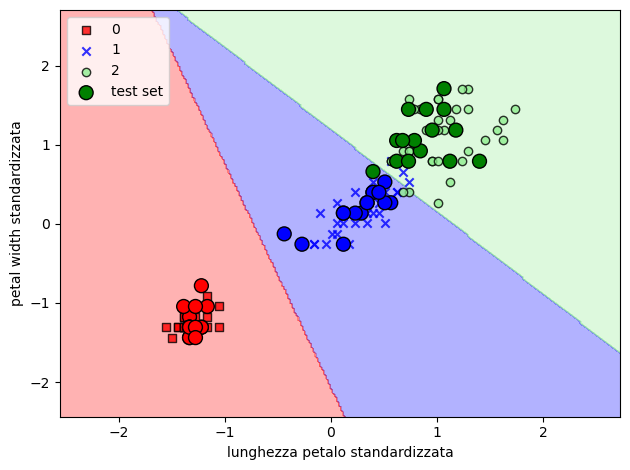

In [6]:
#visualizziamo i risultati
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier,test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')
        
#plottiamo tutti gli esempi
    if test_idx:
        X_test,y_test=X[test_idx,:],y[test_idx] #sto definendo i miei dataset di training e test
        #creo dataframe,in x_test ho due colonne che ho separato X_test_0 X_test_1
        #la mia terza colonna è la y_test
        df = pd.DataFrame(dict(X_test_0=X_test[:,0],X_test_1=X_test[:,1], y_test=y_test))
        #creo un dizionario di colori
        colori = {0:'red', 2:'green', 1:'blue'}
        
        
        plt.scatter(df["X_test_0"],df["X_test_1"],
                    c=df["y_test"].map(colori),edgecolor="black",alpha=1.0,
                    linewidth=1,marker="o",
                    s=100,label="test set")
    
x_combinated_std=np.vstack((x_train_std,x_test_std))
y_combined=np.hstack((y_train,y_test))

plot_decision_regions(X=x_combinated_std,
                    y=y_combined,
                    classifier=lr,
                    test_idx=range(105,150))

plt.xlabel("lunghezza petalo standardizzata")
plt.ylabel("petal width standardizzata")
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()

In [9]:
#possiamo predire le probabilità dei primi 3 esempi presenti nel dataset:
lr.predict_proba(x_test_std[:3,:])
#la prima riga corrisponde alla prob di appartenere a una classe del primo fiore e cosi via
#         0                  1               2

array([[3.81527885e-09, 1.44792866e-01, 8.55207131e-01],
       [8.34020679e-01, 1.65979321e-01, 3.25737138e-13],
       [8.48831425e-01, 1.51168575e-01, 2.62277619e-14]])

In [10]:
lr.predict_proba(x_test_std[:3,:]).argmax(axis=1)
#*il risultato: il primo fiore appartiene alla classe 2 , il secondo alla classe 0 e il terzo alla 0

array([2, 0, 0], dtype=int64)

per ottenere le etichette delle classi consiste nel richiamare direttamente il metodo predict

In [15]:
lr.predict(x_test_std[:3,:])

array([2, 0, 0, 1])

Se vogliamo predire l'etichetta della classe di una singola riga del dataset,
sklearn si aspetta in input un array bidimensionale.
Per tanto è necessario convertire una riga in tale formato con Numpy reshape:

In [22]:
lr.predict(x_test_std[0,:].reshape(1,-1))

array([2])